## Random Problem Generator for Pole Locations

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF
import random_bode_generator as rbg

In [36]:
from numpy import random

In [37]:
random.rand()

0.9801130720575908

In [85]:
def random_so_tf(force_unstable=False):
    z = random.rand()*1.1
    # unstable sometimes:
    if (random.rand() < 0.1) or force_unstable:
        z *= -1
    wn = 10*pi*random.rand()
    G = TF(wn**2, [1,2*z*wn,wn**2])
    return G

In [86]:
def check_zeta_and_wn(G):
    p = G.poles()
    wn = np.abs(p[0])
    z = -np.real(p[0])/wn
    return z, wn

In [87]:
def get_specs(G):
    z, wn = check_zeta_and_wn(G)
    wd = wn*np.sqrt(1-z**2)
    ts = 3.91/(z*wn)
    Mp = np.exp(-z*np.pi/(np.sqrt(1-z**2)))
    if z < 0:
        # unstable
        line1 = "zeta = %0.3g, unstable!" % z
        if z < -1:
            # unstable real pole
            line2 = "unstable real pole"
            line3 = "exponential growth without oscillations"
        else:
            # unstable underdamped pole
            line2 = "unstable complex pole"
            line3 = "growing oscillations"
    else:
        line1 = "zeta = %0.3g, overshoot = %0.4g" % (z, Mp)
        line2 = "wd = %0.4g, wn = %0.4g" % (wd, wn)
        line3 = "ts = %0.4g" % ts
    return [line1, line2, line3]

In [88]:
def plot_step_responses(G_list, t=None, start_ind=1, stop_t=2):
    if t is None:
        t = np.arange(0,stop_t,0.001)
    plt.figure()

    for n, G in enumerate(G_list):
        to, y_n = control.step_response(G, t)
        j = n + start_ind
        mylabel = "$G_{%i}$" % j
        plt.plot(t, y_n, label=mylabel)

    plt.legend()
    plt.xlabel("Time (sec.)")
    plt.ylabel("Step Response")

In [89]:
def plot_pole_locations(G_list, start_ind=1):
    mysymbols =['^','o','s','h','D','X']
    plt.figure()

    N = len(G_list)
    n_vect = np.arange(N)
    
    for n, G, sym in zip(n_vect, G_list, mysymbols):
        poles = G.poles()
        j = n + start_ind
        mylabel = "$G_{%i}$" % j
        plt.plot(np.real(poles), np.imag(poles), sym, label=mylabel)

    plt.legend()
    plt.xlabel("Real")
    plt.ylabel("Imag")
    mymax = 35
    myx = [-mymax,5]
    myy = [-mymax,mymax]
    plt.xlim(myx)
    plt.ylim(myy)
    plt.plot(myx,[0,0],'k:', label=None)
    plt.plot([0,0], myy,'k:', label=None)

## Generate a practice problem:

In [91]:
G1 = random_so_tf()
G1

TransferFunction(array([252.62928965]), array([  1.        ,  12.13938526, 252.62928965]))

In [92]:
G2 = random_so_tf()
G2

TransferFunction(array([533.10508933]), array([  1.        ,  23.25293675, 533.10508933]))

### Problem Statement

For the two transfer functions above:

- find the pole locations and plot them on a real vs. imaginary axis
- find $\zeta$, $\omega_n$, and $\omega_d$ from the pole locations
- calculate the time domain specs
- sketch the step responses with respect to one another

## Check Your Answer:

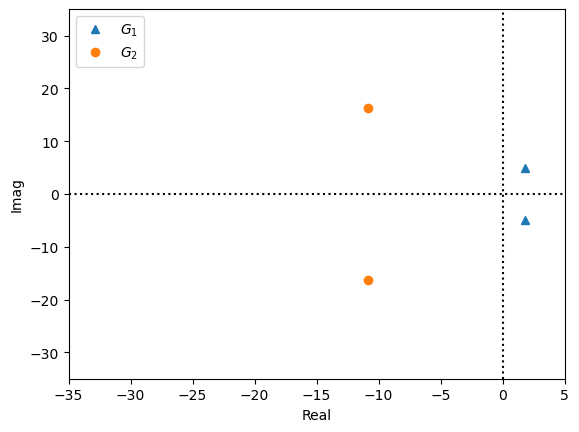

In [51]:
plot_pole_locations([G1,G2])

In [58]:
check_zeta_and_wn(G1)

(np.float64(-0.35211301256442423), np.float64(5.210530667813768))

In [59]:
check_zeta_and_wn(G2)

(np.float64(0.555330539566991), np.float64(19.52361788044081))

In [60]:
get_specs(G1)

['zeta = -0.352, unstable!', 'unstable complex pole', 'growing oscillations']

In [61]:
get_specs(G2)

['zeta = 0.555, overshoot = 0.1227', 'wd = 16.24, wn = 19.52', 'ts = 0.3606']

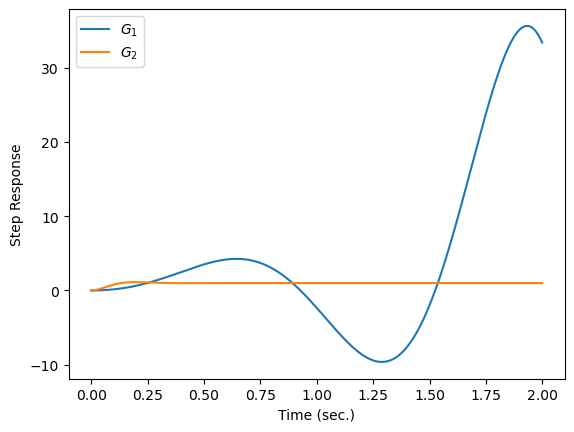

In [62]:
plot_step_responses([G1,G2])